In [1]:
import networkx as nx
import copy
import numpy as np
import math

### SimRank implementation

In [2]:
class SimRank():
    """
    Similairy between pages
    """
    def __init__(self,graph,max_iter=5,C=0.6):
        """
        initialization: input directed graph to calculate similarity between pages
        """
        self.graph=graph
        self.max_iter=max_iter # calcuclating SimRank 5 runs
        self.C=C # decay factor
        self.nodes=list(graph.nodes)
        self.S_index={} # storing indices of each node(web)

    def similarity(self):
        """
        main calculate function
        """
        for i,v in enumerate(self.nodes):
            self.S_index[v]=i
        
        # S: matrix of similairy between pages
        # initial S: diagnal matrix, all values are `1` in diagnal
        S=np.zeros((len(self.nodes),len(self.nodes)))
        for v1 in self.nodes:
            for v2 in self.nodes:
                if v1==v2:
                    S[self.S_index[v1]][self.S_index[v2]]=1
        # rapeatedly calculating SimRank
        for i in range(self.max_iter):
            for v1_i in range(len(self.nodes)):
                for v2_i in range(len(self.nodes)):
                    v1=self.nodes[v1_i]
                    v2=self.nodes[v2_i]
                    if v1==v2:
                        continue
                    # updating matrix S
                    s=0
                    if len(list(self.graph.predecessors(v1)))*len(list(self.graph.predecessors(v2)))==0:
                        continue
                    for in_1 in list(self.graph.predecessors(v1)):
                        for in_2 in list(self.graph.predecessors(v2)):
                            s+=S[self.S_index[in_1]][self.S_index[in_2]]
                    S[v1_i][v2_i]=self.C/(len(list(self.graph.predecessors(v1)))*len(list(self.graph.predecessors(v2))))*(s)
        return S

In [3]:
# import hw3 data and print out their authority and hub values
import matplotlib.pyplot as plt
import seaborn as sns
import time
compu_time=[]
nodes=[]

for i in range(1,6):
    t=time.time()
    edges=[]
    with open('hw3dataset/graph_{}.txt'.format(i),'r') as f:
        print('\n========graph_{}========='.format(i))
        for l in f.readlines():
            edges.append(tuple(l.strip().split(',')))
        G=nx.DiGraph()
        G.add_edges_from(edges)
        s=SimRank(G).similarity()
        compu_time.append(time.time()-t)
        print('Computation time:',compu_time[-1])
        nodes.append(len(list(G.nodes)))
        sns.heatmap(s)
        plt.show()
        print('similarity values:\n',s)


========graph_1=========
Computation time: 0.0006852149963378906


<Figure size 640x480 with 2 Axes>

similarity values:
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

========graph_2=========
Computation time: 0.0007083415985107422


<Figure size 640x480 with 2 Axes>

similarity values:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

========graph_3=========
Computation time: 0.0004398822784423828


<Figure size 640x480 with 2 Axes>

similarity values:
 [[1.         0.         0.42856299 0.        ]
 [0.         1.         0.         0.4285689 ]
 [0.42856299 0.         1.         0.        ]
 [0.         0.4285689  0.         1.        ]]

========graph_4=========
Computation time: 0.004568338394165039


<Figure size 640x480 with 2 Axes>

similarity values:
 [[1.         0.16486821 0.15631149 0.16406895 0.14639402 0.10318639
  0.22495151]
 [0.16502177 1.         0.21592979 0.18156624 0.21361825 0.26343906
  0.09969343]
 [0.15662277 0.21614645 1.         0.2610884  0.19782538 0.26166648
  0.26051032]
 [0.16450691 0.18196972 0.2612983  1.         0.15813712 0.34369082
  0.34391821]
 [0.14711578 0.2140803  0.19810827 0.15835799 1.         0.22377732
  0.09293867]
 [0.10387878 0.26407609 0.26209259 0.34391821 0.22383103 1.
  0.08783641]
 [0.22576908 0.10071641 0.26109475 0.34413473 0.09332846 0.08826947
  1.        ]]

========graph_5=========
Computation time: 7.479926824569702


<Figure size 640x480 with 2 Axes>

similarity values:
 [[1.  0.  0.  ... 0.  0.  0. ]
 [0.  1.  0.6 ... 0.  0.  0. ]
 [0.  0.6 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.6 0.6]
 [0.  0.  0.  ... 0.6 1.  0.6]
 [0.  0.  0.  ... 0.6 0.6 1. ]]


### computation analysis

/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


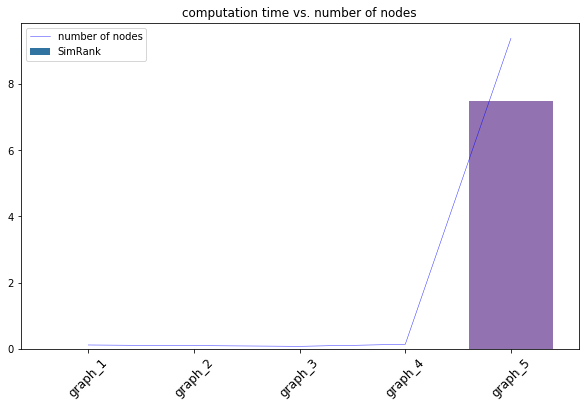

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(np.arange(len(compu_time)),compu_time,label='SimRank')
sns.lineplot(np.arange(len(compu_time)),np.array(nodes)*0.02,lw=0.5,c='b',alpha=0.8,label='number of nodes')
plt.title('computation time vs. number of nodes')
plt.xticks(np.arange(len(compu_time)),('graph_1','graph_2','graph_3','graph_4','graph_5')
                                       ,fontsize=12,rotation=45)
plt.show()